Спарсить акции компании Apple. Првести анализ ряда. Построить прогноз,используя эконометрический подход и методы машинного обучения.

In [ ]:
import fix_yahoo_finance as yf
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
data = yf.download("AAPL", start="2000-1-1", end="2020-11-1")
data.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,0.936384,1.004464,0.907924,0.999442,0.855168,535796800
2000-01-04,0.966518,0.987723,0.903460,0.915179,0.783068,512377600
2000-01-05,0.926339,0.987165,0.919643,0.928571,0.794528,778321600
2000-01-06,0.947545,0.955357,0.848214,0.848214,0.725771,767972800
2000-01-07,0.861607,0.901786,0.852679,0.888393,0.760149,460734400


**Open** – Цена акций на момент открытия торгов.

**High** – Максимальное значение в течение дня.

**Low** – минимальная цена в течение дня.

**Close** – цена к закрытию торгов в конце дня.

**Volume** – Как много акции было продано/куплено в течение дня.

**Adj Close** – скорректированная цена акции. Это цена закрытия, дня, которая была немного адаптирована с учетом любых действий, которые произошли в любое время до открытия следующего дня. Вы можете использовать этот столбец для изучения исторической доходности или при выполнении подробного анализа исторической доходности.

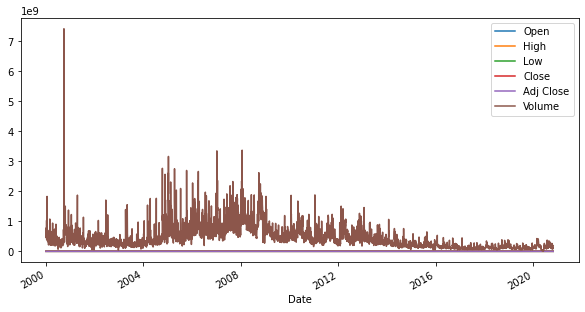

In [ ]:
data.plot(figsize=(10,5))
plt.show()

Однако единственный показатель, который мы можем видеть - это Volume, т.к. он на столько велик, что остальные метрики находятся где-то коло 0 по сравнению с ним и их не видно при таком масштабе. Можно, однако, выбрать какой именно показатель мы можем вывести:

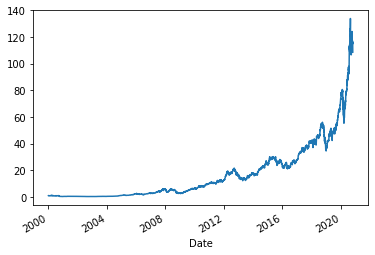

In [ ]:
data['Adj Close'].plot()
plt.show()

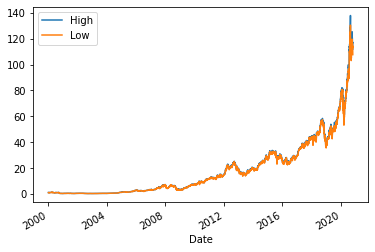

In [ ]:
data[['High','Low']].plot()

Используя ```data[‘100ma’]```, мы определяем новый столбец в наших данных. Мы берем данные из столбца **Adj Close**, применяем к нему скользящее окно на 100 дней `(rolling(window=100))` и находим среднее каждого из этих окон `(.mean())`. Если мы сделаем:

In [ ]:
data['100ma'] = data['Adj Close'].rolling(window=100,min_periods=0).mean()

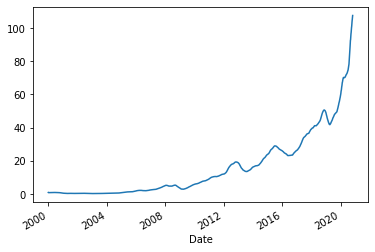

In [ ]:
data['100ma'].plot()

Мы можем создать два графика на виртуальной разметке 6 на 1. Первый график займет первые пять ячеек в этой разметке начиная с координаты (0,0). Второй график займет лишь одну ячейку начиная с координаты (5,0). На первом графике мы выводим параметры Adj Close и 100ma. На втором только Volume.

<BarContainer object of 5242 artists>

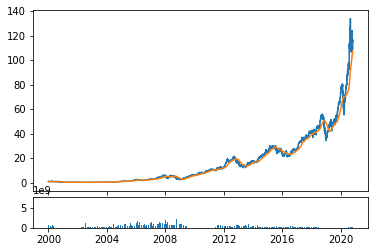

In [ ]:
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1,sharex=ax1)
ax1.plot(data.index, data['Adj Close'])
ax1.plot(data.index, data['100ma'])
ax2.bar(data.index, data['Volume'])

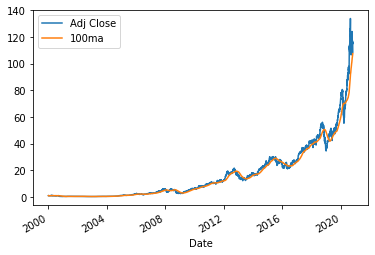

In [ ]:
data[['Adj Close', '100ma']].plot()

Теперь сделаем OHLC (Open, High, Low, Close) график, или так называемый график свечей. Он содержит Open, High, Low и Close параметры в более красивом виде.

In [ ]:
!pip install mplfinance

     |████████████████████████████████| 61kB 3.0MB/s 


In [ ]:
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates

df_ohlc = data['Adj Close'].resample('10D').ohlc()
df_ohlc.head()

,open,high,low,close
Date,,,,
2000-01-03,0.855168,0.855168,0.666086,0.666086
2000-01-13,0.739140,0.867105,0.739140,0.850393
2000-01-23,0.811717,0.857555,0.765879,0.765879
2000-02-02,0.754897,0.877609,0.754897,0.830816
2000-02-12,0.884772,0.909123,0.849916,0.849916


In [ ]:
import plotly.graph_objects as go
import pandas as pd

fig = go.Figure(
    data=go.Ohlc(
        x=df_ohlc.index,
        open=df_ohlc["open"],
        high=df_ohlc["high"],
        low=df_ohlc["low"],
        close=df_ohlc["close"]
    )
)
fig.show()

In [ ]:
!pip install fbprophet

Проинизиализируем модель, натренируем её со всеми параметрами по умолчанию и попробуем спрогнозировать данные на год вперёд

In [ ]:
from fbprophet import Prophet
m = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    seasonality_mode='additive'
)
fbprophet_df = pd.DataFrame({'ds': data.index, 'y': data['Adj Close']})
m.fit(fbprophet_df)
future = m.make_future_dataframe(periods=365, freq='d')
forecast = m.predict(future)

Проведём построения

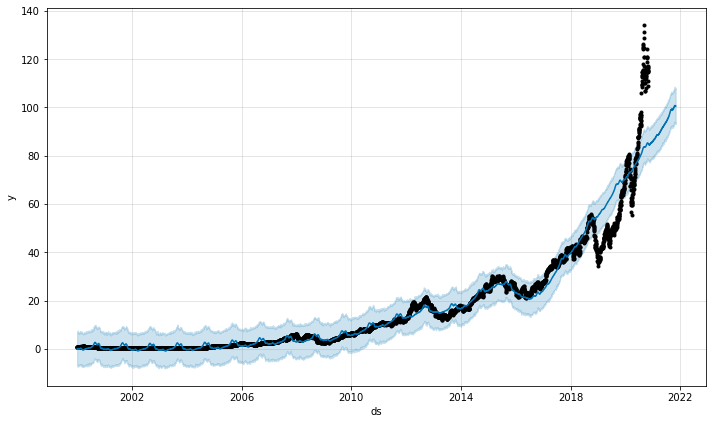

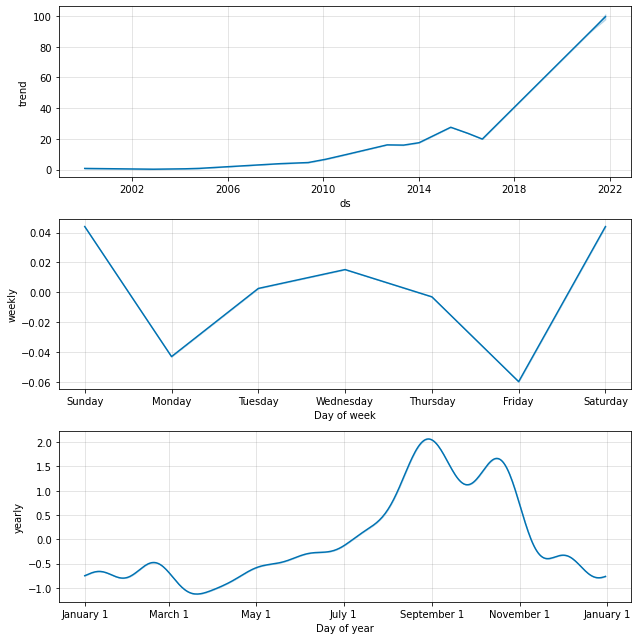

In [ ]:
m.plot(forecast)
m.plot_components(forecast)
plt.show()

Были получены графики прогноза с извлеченной компонентой тренда и доверительным интервалом изменений значений, а также графики изменений данных по различным сезонам.

Мы используем ‘Open-Close’ и ‘High-Low’ в качестве предикторной переменной.

In [22]:
# Predictor variables
data['Open-Close']= data.Open-data.Close
data['High-Low']  = data.High - data.Low
data =data.dropna()
X=data[['Open-Close', 'High-Low']]
X.head()

,Open-Close,High-Low
Date,,
2000-01-03,-0.063058,0.096540
2000-01-04,0.051339,0.084263
2000-01-05,-0.002232,0.067522
2000-01-06,0.099331,0.107143
2000-01-07,-0.026786,0.049107


Целевая переменная, также известная как зависимая переменная, - это переменная, значения которой должны быть предсказаны с помощью переменных-предикторов. Здесь целевой переменной является то, закроется ли цена **AAPL** вверх или вниз в следующий торговый день.

Логика заключается в том, что если цена закрытия завтрашнего дня выше сегодняшней цены закрытия, мы будем покупать **AAPL**, иначе мы будем продавать AAPL.

Мы сохраним +1 для сигнала покупки и -1 для сигнала продажи. Мы сохраним целевую переменную в переменной «Y».

In [25]:
import numpy as np

# Target variable
Y=np.where(data['Close'].shift(-1)>data['Close'],1,-1)

**Разбиение данных**

In [27]:
split_percentage = 0.7
split = int(split_percentage*len(data))

X_train = X[:split]
Y_train = Y[:split]

X_test = X[split:]
Y_test = Y[split:]

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
# knn модель 
knn = KNeighborsClassifier(n_neighbors=17)

# тренируем
knn.fit(X_train, Y_train)

# считаем точность
accuracy_train = accuracy_score(Y_train, knn.predict(X_train))
accuracy_test = accuracy_score(Y_test, knn.predict(X_test))

print ('Train_data Accuracy: %.2f' %accuracy_train)
print ('Test_data Accuracy: %.2f' %accuracy_test)

Train_data Accuracy: 0.59
Test_data Accuracy: 0.51


Здесь мы видим, что точность тестового набора данных составляет 50%, что означает, что в 50% случаев наш прогноз будет правильным.

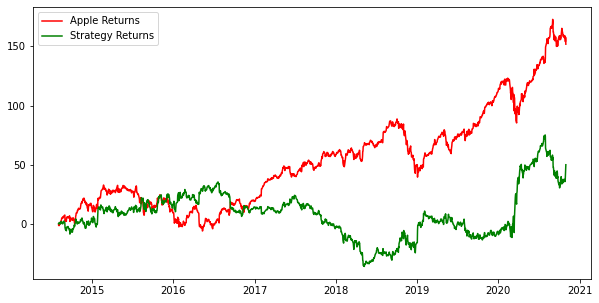

In [29]:
#0 прогнозируемый сигнал
data['прогнозируемый сигнал'] = knn.predict(X)

# назначаем переменные apple и считаем кумультативную сумму  
data['Apple_returns'] = np.log(data['Close']/data['Close'].shift(1))
Cumulative_Apple_returns = data[split:]['Apple_returns'].cumsum()*100

# результат стретегии
data['Startegy_returns'] = data['Apple_returns']* data['прогнозируемый сигнал'].shift(1)
Cumulative_Strategy_returns = data[split:]['Startegy_returns'].cumsum()*100

# рисуем результаты

plt.figure(figsize=(10,5))
plt.plot(Cumulative_Apple_returns, color='r',label = 'Apple Returns')
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.legend()
plt.show()

> **```Коэффициент Шарпа```** - это прибыль, превышающая рыночную доходность на единицу волатильности. 

> Сначала мы рассчитаем стандартное отклонение совокупной доходности и используем его в дальнейшем для расчета коэффициента Шарпа.

In [30]:
Std = Cumulative_Strategy_returns.std()
Sharpe = (abs(Cumulative_Strategy_returns-Cumulative_Apple_returns))/Std
Sharpe = Sharpe.mean()
print('Sharpe ratio: %.2f'%Sharpe )

Sharpe ratio: 2.45
